### LSTM model stock price prediction

In [1]:
import pandas_datareader as pdr

In [2]:
key = "a60c8828f9db6c01acb0cd5049f287f77070374e"

In [3]:
df = pdr.get_data_tiingo('GOOG', api_key = key)

C:\Users\HP\AppData\Local\Temp\ipykernel_17020\3722051823.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('GOOG', api_key = key)


In [4]:
df.to_csv('GOOG.csv')

In [5]:
df.head()

close      high      low     open  \
symbol date                                                             
GOOG   2019-01-22 00:00:00+00:00  1070.52  1091.510  1063.47  1088.00   
       2019-01-23 00:00:00+00:00  1075.57  1084.930  1059.75  1077.35   
       2019-01-24 00:00:00+00:00  1073.90  1079.475  1060.70  1076.48   
       2019-01-25 00:00:00+00:00  1090.99  1094.000  1081.82  1085.00   
       2019-01-28 00:00:00+00:00  1070.08  1083.000  1063.80  1080.11   

                                   volume  adjClose   adjHigh   adjLow  \
symbol date                                                              
GOOG   2019-01-22 00:00:00+00:00  1613527   53.5260  54.57550  53.1735   
       2019-01-23 00:00:00+00:00   966956   53.7785  54.24650  52.9875   
       2019-01-24 00:00:00+00:00  1361673   53.6950  53.97375  53.0350   
       2019-01-25 00:00:00+00:00  1119216   54.5495  54.70000  54.0910   
       2019-01-28 00:00:00+00:00  1284281   53.5040  54.15000  53.1900   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
GOOG   2019-01-22 00:00:00+00:00  54.4000   32270540      0.0          1.0  
       2019-01-23 00:00:00+00:00  53.8675   19339120      0.0          1.0  
       2019-01-24 00:00:00+00:00  53.8240   27233460      0.0          1.0  
       2019-01-25 00:00:00+00:00  54.2500   22384320      0.0          1.0  
       2019-01-28 00:00:00+00:00  54.0055   25685620      0.0          1.0

In [6]:
df.tail()

close     high       low     open  \
symbol date                                                            
GOOG   2024-01-10 00:00:00+00:00  143.80  144.525  142.4600  142.520   
       2024-01-11 00:00:00+00:00  143.67  146.660  142.2150  144.895   
       2024-01-12 00:00:00+00:00  144.24  144.740  143.3600  144.340   
       2024-01-16 00:00:00+00:00  144.08  145.840  143.0564  143.430   
       2024-01-17 00:00:00+00:00  142.89  143.410  140.5100  142.910   

                                    volume  adjClose  adjHigh    adjLow  \
symbol date                                                               
GOOG   2024-01-10 00:00:00+00:00  16641881    143.80  144.525  142.4600   
       2024-01-11 00:00:00+00:00  17471130    143.67  146.660  142.2150   
       2024-01-12 00:00:00+00:00  13998729    144.24  144.740  143.3600   
       2024-01-16 00:00:00+00:00  19198939    144.08  145.840  143.0564   
       2024-01-17 00:00:00+00:00  17884548    142.89  143.410  140.5100   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
GOOG   2024-01-10 00:00:00+00:00  142.520   16641881      0.0          1.0  
       2024-01-11 00:00:00+00:00  144.895   17471130      0.0          1.0  
       2024-01-12 00:00:00+00:00  144.340   13998729      0.0          1.0  
       2024-01-16 00:00:00+00:00  143.430   19198939      0.0          1.0  
       2024-01-17 00:00:00+00:00  142.910   17884548      0.0          1.0

In [7]:
df1 = df.reset_index()['close']

In [8]:
df1.shape

(1256,)

In [9]:
df1

0       1070.52
1       1075.57
2       1073.90
3       1090.99
4       1070.08
         ...   
1251     143.80
1252     143.67
1253     144.24
1254     144.08
1255     142.89
Name: close, Length: 1256, dtype: float64

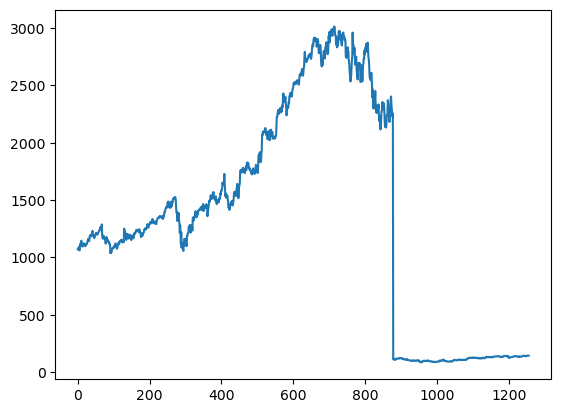

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np 

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.33679099]
 [0.33851414]
 [0.33794431]
 ...
 [0.02072891]
 [0.02067431]
 [0.02026826]]


In [14]:
# splitting the dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [15]:
training_size, test_size

(816, 440)

In [17]:
train_data

array([[0.33679099],
       [0.33851414],
       [0.33794431],
       [0.3437757 ],
       [0.33664086],
       [0.33341295],
       [0.34311715],
       [0.35243577],
       [0.35051814],
       [0.35804196],
       [0.36254261],
       [0.35204679],
       [0.34640989],
       [0.34516445],
       [0.34514739],
       [0.35414186],
       [0.35372899],
       [0.35424422],
       [0.35150767],
       [0.35318304],
       [0.35155885],
       [0.34581617],
       [0.35038848],
       [0.35005749],
       [0.35201267],
       [0.35232659],
       [0.35364709],
       [0.36083653],
       [0.36316021],
       [0.36801572],
       [0.36659285],
       [0.36162474],
       [0.36129034],
       [0.37270063],
       [0.37865144],
       [0.37869239],
       [0.37604114],
       [0.37566921],
       [0.37560097],
       [0.38057932],
       [0.38915068],
       [0.39173369],
       [0.38284841],
       [0.3785832 ],
       [0.37572381],
       [0.37176569],
       [0.37021998],
       [0.371

In [20]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [] , []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i +time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i +time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
#reshape into X=t, t+1, t+2,t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [22]:
print(X_train)

[[0.33679099 0.33851414 0.33794431 ... 0.33958897 0.33901231 0.3430182 ]
 [0.33851414 0.33794431 0.3437757  ... 0.33901231 0.3430182  0.34185124]
 [0.33794431 0.3437757  0.33664086 ... 0.3430182  0.34185124 0.34429093]
 ...
 [0.98885587 0.98876033 1.         ... 0.90764632 0.90279422 0.8860439 ]
 [0.98876033 1.         0.99483739 ... 0.90279422 0.8860439  0.85728617]
 [1.         0.99483739 0.97522426 ... 0.8860439  0.85728617 0.84758197]]


In [23]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [24]:
#Reshape input to be [samples, time_step, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
#Creating a Stack  LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 427ms/step - loss: 0.1492 - val_loss: 0.0265
Epoch 2/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0181 - val_loss: 0.0285
Epoch 3/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0086 - val_loss: 0.0136
Epoch 4/100
12/12 [==============================] - 3s 229ms/step - loss: 0.0042 - val_loss: 0.0095
Epoch 5/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 6/100
12/12 [==============================] - 3s 235ms/step - loss: 9.8548e-04 - val_loss: 0.0023
Epoch 7/100
12/12 [==============================] - 3s 234ms/step - loss: 9.0172e-04 - val_loss: 0.0016
Epoch 8/100
12/12 [==============================] - 3s 234ms/step - loss: 8.6233e-04 - val_loss: 0.0018
Epoch 9/100
12/12 [==============================] - 3s 235ms/step - loss: 9.5132e-04 - val_loss: 0.0020
Epoch 10/100
12/12 [==============================] - 3s 233ms/step - loss

12/12 [==============================] - 3s 232ms/step - loss: 5.9272e-04 - val_loss: 1.4933e-04
Epoch 77/100
12/12 [==============================] - 3s 231ms/step - loss: 7.0577e-04 - val_loss: 1.3248e-04
Epoch 78/100
12/12 [==============================] - 3s 231ms/step - loss: 6.2373e-04 - val_loss: 1.2677e-04
Epoch 79/100
12/12 [==============================] - 3s 230ms/step - loss: 5.9514e-04 - val_loss: 1.5871e-04
Epoch 80/100
12/12 [==============================] - 3s 230ms/step - loss: 6.3727e-04 - val_loss: 1.0749e-04
Epoch 81/100
12/12 [==============================] - 3s 234ms/step - loss: 5.9765e-04 - val_loss: 1.2181e-04
Epoch 82/100
12/12 [==============================] - 3s 228ms/step - loss: 6.1978e-04 - val_loss: 1.6337e-04
Epoch 83/100
12/12 [==============================] - 3s 226ms/step - loss: 5.6623e-04 - val_loss: 7.9039e-05
Epoch 84/100
12/12 [==============================] - 3s 229ms/step - loss: 5.8140e-04 - val_loss: 1.3554e-04
Epoch 85/100
12/12 [===

In [30]:
import tensorflow as tf

In [31]:
# Lets do the prediction and check preformance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 45ms/step


In [32]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [33]:
# Calculating the RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

2018.6414025028544

In [34]:
# Test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

140.8361075463625

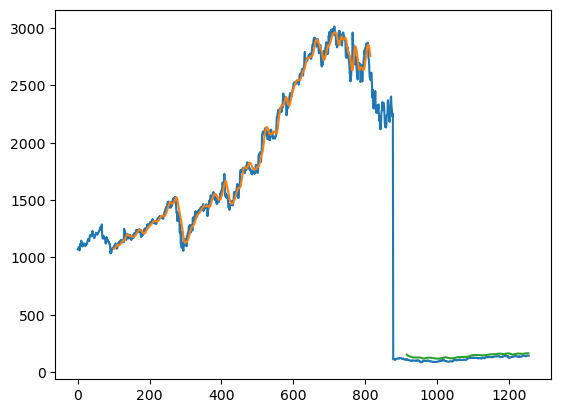

In [35]:
# Plotting 
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) +look_back,:] = train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict) +(look_back*2)+1 : len(df1)-1,:] = test_predict
#plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

440

In [38]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [40]:
temp_input

[0.01601329379770634,
 0.016105422272570624,
 0.016480760503499173,
 0.0177432618257134,
 0.018234613691656232,
 0.018377924652556225,
 0.018190255537091953,
 0.018159546045470525,
 0.017702315836884832,
 0.0179855255929491,
 0.01832674216652051,
 0.018510999116249077,
 0.017941167438384812,
 0.018429107138591933,
 0.018937519833213342,
 0.018702080397449066,
 0.0189272833360062,
 0.018882925181441915,
 0.017436166909499128,
 0.01633403737686347,
 0.016296503553770613,
 0.016610422801456307,
 0.01568231372134207,
 0.01636815903422061,
 0.016937990712084867,
 0.01650123349791346,
 0.01763407252217054,
 0.01699599752959201,
 0.018009410753099104,
 0.01791387011249911,
 0.01884880352408477,
 0.019111540285734755,
 0.01900917531366333,
 0.019862216747591862,
 0.01938110137885617,
 0.01879762103804906,
 0.019449344693570455,
 0.019619952980356164,
 0.019036472639549048,
 0.018934107667477617,
 0.018169782542677666,
 0.018565593768020503,
 0.019323094561349032,
 0.01473373164681355,
 0.01363

In [41]:
#Demonstrate prediction for next 10 days
from numpy import array
lst_output = []
n_steps =100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input= x_input.reshape(1, n_steps,1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.02760931]
101
1 day input [0.01610542 0.01648076 0.01774326 0.01823461 0.01837792 0.01819026
 0.01815955 0.01770232 0.01798553 0.01832674 0.018511   0.01794117
 0.01842911 0.01893752 0.01870208 0.01892728 0.01888293 0.01743617
 0.01633404 0.0162965  0.01661042 0.01568231 0.01636816 0.01693799
 0.01650123 0.01763407 0.016996   0.01800941 0.01791387 0.0188488
 0.01911154 0.01900918 0.01986222 0.0193811  0.01879762 0.01944934
 0.01961995 0.01903647 0.01893411 0.01816978 0.01856559 0.01932309
 0.01473373 0.0136316  0.01361795 0.01441981 0.01426626 0.01504083
 0.01538546 0.01599623 0.01636475 0.0166889  0.01698235 0.01644664
 0.01725532 0.01711201 0.01772279 0.01804694 0.01883857 0.01823803
 0.01857242 0.01881127 0.01928897 0.01867478 0.01861678 0.01881127
 0.01805377 0.01720755 0.01700282 0.01608495 0.01668549 0.01635792
 0.01875326 0.01813566 0.0174737  0.01711201 0.01722461 0.01696188
 0.01718025 0.01832333 0.01863384 0.01916613 0.01989634 0.02021026
 0.02024438 0.0197735  0.01971891 

8 day output
9 day input [0.01798553 0.01832674 0.018511   0.01794117 0.01842911 0.01893752
 0.01870208 0.01892728 0.01888293 0.01743617 0.01633404 0.0162965
 0.01661042 0.01568231 0.01636816 0.01693799 0.01650123 0.01763407
 0.016996   0.01800941 0.01791387 0.0188488  0.01911154 0.01900918
 0.01986222 0.0193811  0.01879762 0.01944934 0.01961995 0.01903647
 0.01893411 0.01816978 0.01856559 0.01932309 0.01473373 0.0136316
 0.01361795 0.01441981 0.01426626 0.01504083 0.01538546 0.01599623
 0.01636475 0.0166889  0.01698235 0.01644664 0.01725532 0.01711201
 0.01772279 0.01804694 0.01883857 0.01823803 0.01857242 0.01881127
 0.01928897 0.01867478 0.01861678 0.01881127 0.01805377 0.01720755
 0.01700282 0.01608495 0.01668549 0.01635792 0.01875326 0.01813566
 0.0174737  0.01711201 0.01722461 0.01696188 0.01718025 0.01832333
 0.01863384 0.01916613 0.01989634 0.02021026 0.02024438 0.0197735
 0.01971891 0.01959948 0.01913201 0.01940499 0.01861336 0.01839157
 0.01946299 0.02015566 0.02057877 0.0205

17 day output
18 day input [0.01743617 0.01633404 0.0162965  0.01661042 0.01568231 0.01636816
 0.01693799 0.01650123 0.01763407 0.016996   0.01800941 0.01791387
 0.0188488  0.01911154 0.01900918 0.01986222 0.0193811  0.01879762
 0.01944934 0.01961995 0.01903647 0.01893411 0.01816978 0.01856559
 0.01932309 0.01473373 0.0136316  0.01361795 0.01441981 0.01426626
 0.01504083 0.01538546 0.01599623 0.01636475 0.0166889  0.01698235
 0.01644664 0.01725532 0.01711201 0.01772279 0.01804694 0.01883857
 0.01823803 0.01857242 0.01881127 0.01928897 0.01867478 0.01861678
 0.01881127 0.01805377 0.01720755 0.01700282 0.01608495 0.01668549
 0.01635792 0.01875326 0.01813566 0.0174737  0.01711201 0.01722461
 0.01696188 0.01718025 0.01832333 0.01863384 0.01916613 0.01989634
 0.02021026 0.02024438 0.0197735  0.01971891 0.01959948 0.01913201
 0.01940499 0.01861336 0.01839157 0.01946299 0.02015566 0.02057877
 0.02053441 0.02072891 0.02067431 0.02026826 0.02760931 0.02784453
 0.0282557  0.02884205 0.02957668 0

25 day output
26 day input [0.01763407 0.016996   0.01800941 0.01791387 0.0188488  0.01911154
 0.01900918 0.01986222 0.0193811  0.01879762 0.01944934 0.01961995
 0.01903647 0.01893411 0.01816978 0.01856559 0.01932309 0.01473373
 0.0136316  0.01361795 0.01441981 0.01426626 0.01504083 0.01538546
 0.01599623 0.01636475 0.0166889  0.01698235 0.01644664 0.01725532
 0.01711201 0.01772279 0.01804694 0.01883857 0.01823803 0.01857242
 0.01881127 0.01928897 0.01867478 0.01861678 0.01881127 0.01805377
 0.01720755 0.01700282 0.01608495 0.01668549 0.01635792 0.01875326
 0.01813566 0.0174737  0.01711201 0.01722461 0.01696188 0.01718025
 0.01832333 0.01863384 0.01916613 0.01989634 0.02021026 0.02024438
 0.0197735  0.01971891 0.01959948 0.01913201 0.01940499 0.01861336
 0.01839157 0.01946299 0.02015566 0.02057877 0.02053441 0.02072891
 0.02067431 0.02026826 0.02760931 0.02784453 0.0282557  0.02884205
 0.02957668 0.0304222  0.03134088 0.03230026 0.0332753  0.0342485
 0.03520889 0.03615051 0.0370709  0.

In [42]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

1256

In [46]:
df3 = df1.tolist()
df3.extend(lst_output)

ValueError: x and y must have same first dimension, but have shapes (100,) and (98, 1)

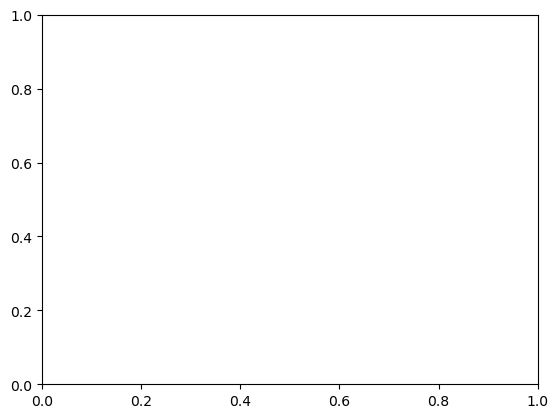

In [47]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

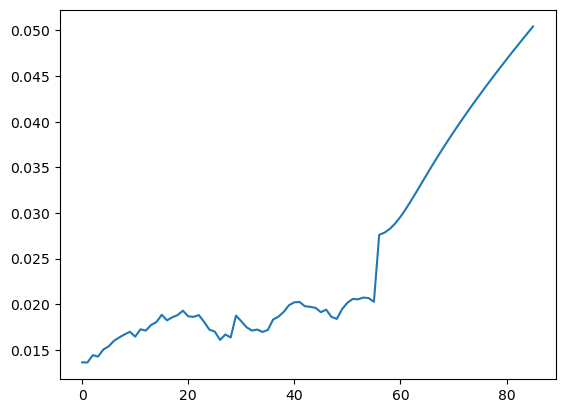

In [50]:
df3= df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])